In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("customer_churn_data.csv")

In [4]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [6]:
df.isna().sum().sum()

297

In [7]:
df["InternetService"] = df["InternetService"].fillna("Unknown")

In [8]:
df.isna().sum().sum()

0

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Unknown,2208.32,No,Yes


In [11]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [12]:
numeric_columns_data = df.select_dtypes( include = ["number"])

In [13]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [14]:
import matplotlib.pyplot as plt

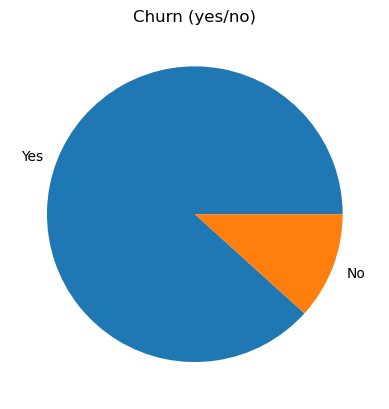

In [15]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (yes/no)")
plt.ylabel("")
plt.show()

In [16]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [17]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [18]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [19]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [20]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

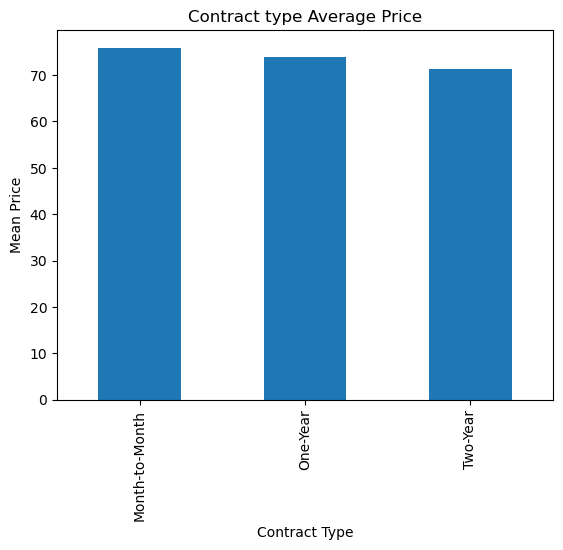

In [21]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract type Average Price")
plt.show()

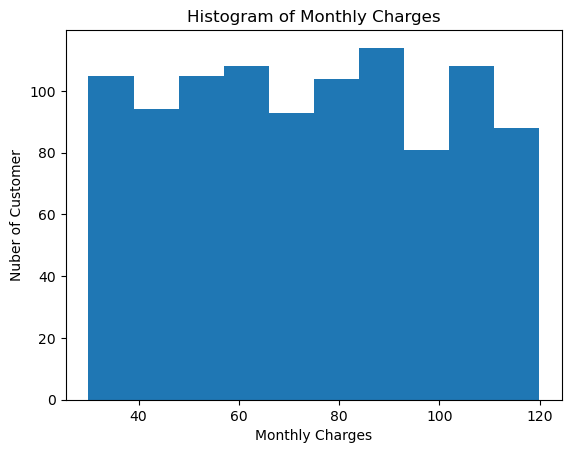

In [22]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.ylabel("Nuber of Customer")
plt.xlabel("Monthly Charges")
plt.show()

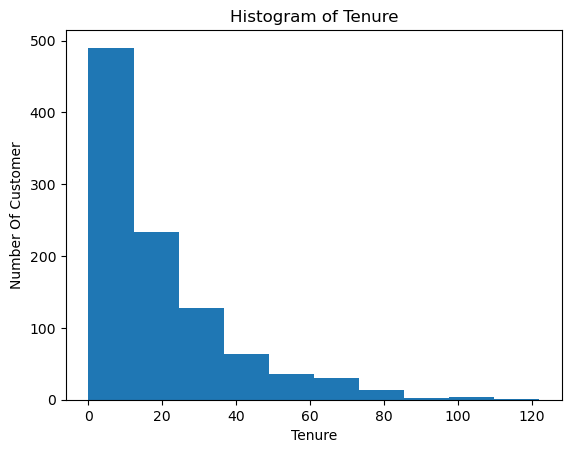

In [23]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Number Of Customer")
plt.show()

In [24]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [25]:
y = df["Churn"]
x = df[["Age", "Gender", "Tenure", "MonthlyCharges"]] # multidimention array

In [26]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [27]:
y

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: Churn, Length: 1000, dtype: object

In [28]:
x["Gender"] = x["Gender"].map({"Female": 1, "Male": 0})


C:\Users\pc\AppData\Local\Temp\ipykernel_11528\1926439251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"] = x["Gender"].map({"Female": 1, "Male": 0})


In [29]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [30]:
type(x["Gender"].iloc[0])


numpy.int64

In [31]:
df["Churn"] = df["Churn"].map({"Yes":1, "No":0}).fillna(0).astype(int)
y = df["Churn"]


In [32]:
print(type(y.iloc[0]))
print(y.iloc[0])


<class 'numpy.int32'>
1


In [33]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0}).fillna(0).astype(int)

In [34]:
df["Churn"].value_counts(dropna=False)
df["Churn"].dtype

dtype('int32')

In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int32

In [36]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [38]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [39]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train) # calculate mean and deviation from the train data


In [40]:
import joblib
joblib.dump(Scaler, "Scaler.pkl") # stores the trained vlues of the transform like mean, sd ect

['Scaler.pkl']

In [41]:
x_test = Scaler.transform(x_test) # using transform to maintain the scale 0 not predicting the future values

In [42]:
from sklearn.metrics import accuracy_score # used to check the accuracy of the model
def model_performance(prediction):
    acc = accuracy_score(y_test, prediction)
    print(f"Accuracy score on model is {acc:.2f}") # gives accuracy till 2  decimal in the float value

In [43]:
from sklearn.model_selection import GridSearchCV # used for hyperparameter tuning
from sklearn.linear_model import LogisticRegression # used for binary classification
log_model = LogisticRegression() 
log_model.fit(x_train, y_train)

LogisticRegression()

In [44]:
y_train.isna().sum()

0

In [45]:
y.isna().sum()


0

In [46]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [47]:
y_pred = log_model.predict(x_test)
model_performance(y_pred)

Accuracy score on model is 0.88


In [48]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    "n_neighbors": [3,5,7,9],
    "weights": ["uniform", "distance"],
}

In [49]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) #prevents overfitting, select parameter with high mean accuracy

In [50]:
gridkn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [51]:
gridkn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [52]:
y_pred = gridkn.predict(x_test)
model_performance(y_pred)

Accuracy score on model is 0.88


In [ ]:
from sklearn.svm import SVC
svm = SVC()
param_grid = {
    "C" : [0.01, 0.1, 0.5, 1], # small c less overfitting
    "kernel" : ["linear", "rbf", "poly"] #straight-line separation, Non-linear, polynomial decision boundary
}
gridsvc = GridSearchCV(svm, param_grid, cv=5)
gridsvc.fit(x_train, y_train)
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [55]:
y_pred =gridsvc.predict(x_test)

In [56]:
model_performance(y_pred)

Accuracy score on model is 0.90


In [57]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    "criterion" : ["gini", "entropy"], #measures impurity using gini or entropy
    "splitter" : ["best", "random"], #chooses the best or random feature to split on
    "max_depth" : [None, 10, 20, ], #maximum depth of the tree
    "min_samples_split" : [2, 5, 10], #minimum samples required to split an internal node
    "min_samples_leaf" : [1, 2, 4] #minimum samples required to be at a leaf node
}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5) # trying every combination of parameters to get the best model
grid_tree.fit(x_train, y_train)
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [58]:
y_pred = grid_tree.predict(x_test)
y_pred
model_performance(y_pred)

Accuracy score on model is 0.85


In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
param_grid = {
    "n_estimators" : [32, 64, 128, 256],
    "max_features" : [2, 3, 4],
    "bootstrap" : [True, False]
}
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [60]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [61]:
y_pred =grid_rfc.predict(x_test)
model_performance(y_pred)

Accuracy score on model is 0.86


In [ ]:
best_model = gridsvc.best_estimator_ # svm is the best model importing the best model
joblib.dump(best_model, "model.pkl")
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')